## Imersão de Dados - Alura

### Apresentação

#### Autores
1.   [Grupo Alura](https://www.alura.com.br) - A maior plataforma brasileira de cursos de tecnologia.
2.   [Lucas Araújo](https://www.linkedin.com/in/lucasaraujo0255/)- Entusiasta de Data Science e cursando Ciências da Computação

### Resumo

Este documento tem o objetivo apresentar um estudo de Data Science oferecido na semana de Imersão de Dados da Alura (https://www.alura.com.br): uma análise exploratória sobre o Exame Nacional do Ensino Médio - o ENEM - na sua edição do ano de 2019 e criação de um modelo de Machine Learning utilizando o Python e as principais bibliotecas na área de Data Science.

### Ferramentas Utilizadas
A análise foi efetuada utilizando-se a linguagem de programação **Python** e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados, além de API´s e outras bibliotecas que serão apresentadas no decorrer do documento.

Os dados foram disponibilizados pela Alura e contém cerca de 128 mil registros de inscrições de alunos que realizaram as provas do ENEM 2019.

Clique [Aqui](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true.) para acessar os dados

#### Desafios - Dia 02:

**1**: Pegar a amostra completa dos alunos menores de idade

**2**: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

**3**: Criar uma função para plotar o boxplot do seaborn

**4**: Verificar se quem zerou a prova foi eliminado ou não estava presente

**5**: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

**6**: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

**7**: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


## [Aula 02](https://www.alura.com.br/imersao-dados/aula01-educacao-no-brasil) - Análise Exploratória

In [3]:
# Normalização
df.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize= True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PI    0.048276
PB    0.048276
GO    0.048276
MT    0.027586
AM    0.027586
DF    0.027586
TO    0.020690
PR    0.020690
SE    0.020690
RO    0.013793
AL    0.013793
SC    0.013793
AC    0.006897
MS    0.006897
RN    0.006897
AP    0.006897
ES    0.006897
RS    0.006897
RJ    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

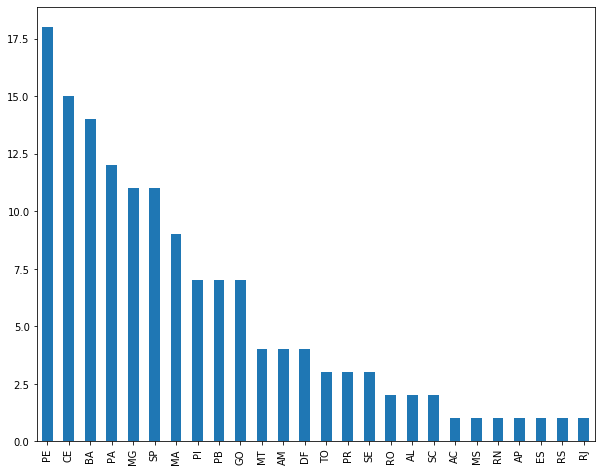

In [4]:
alunos_menor_quatorze = df.query("NU_IDADE <= 14")
alunos_menor_quatorze["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10, 8))

In [5]:
len(alunos_menor_quatorze)

145

In [7]:
# Ordenando...
renda_ordenada = df["Q006"].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

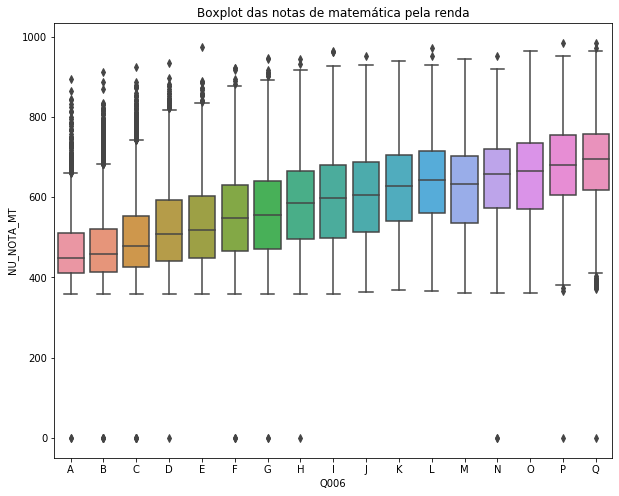

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = df, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

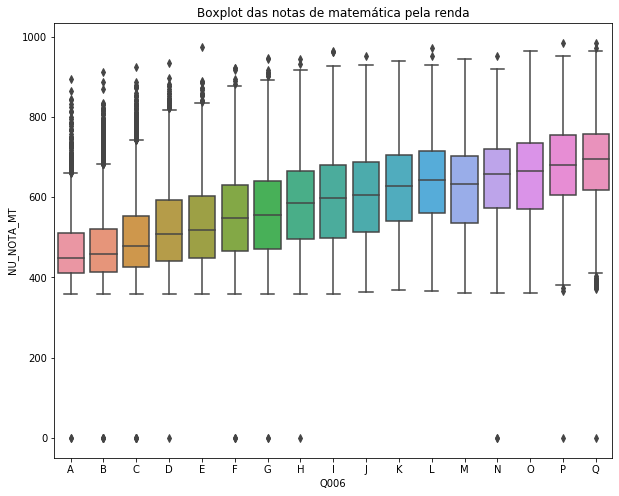

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = df, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")

In [10]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
df[provas].sum(axis = 1)

0         2288.9
1         1184.6
2         2350.5
3         2555.7
4         2803.5
           ...  
127375    2867.4
127376    2218.5
127377    1453.9
127378    2573.9
127379    2287.8
Length: 127380, dtype: float64

In [11]:
df["NU_NOTA_TOTAL"] = df[provas].sum(axis = 1)

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

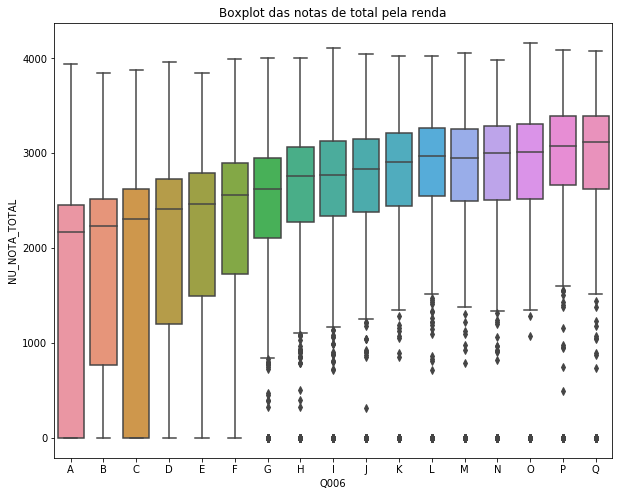

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = df, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

In [13]:
provas =['NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT']
provas.append('NU_NOTA_TOTAL')
df[provas].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_CH,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
df_sem_zero = df.query("NU_NOTA_TOTAL != 0")
df_sem_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

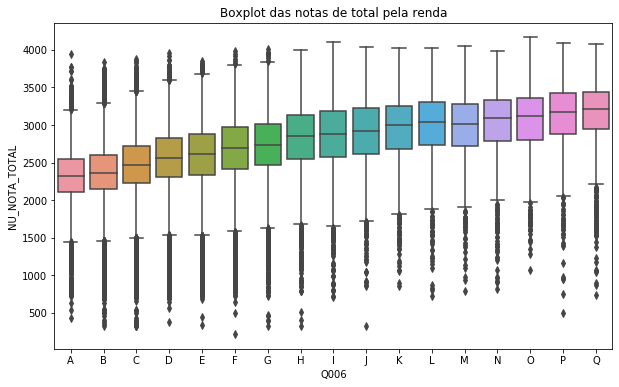

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = df_sem_zero, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

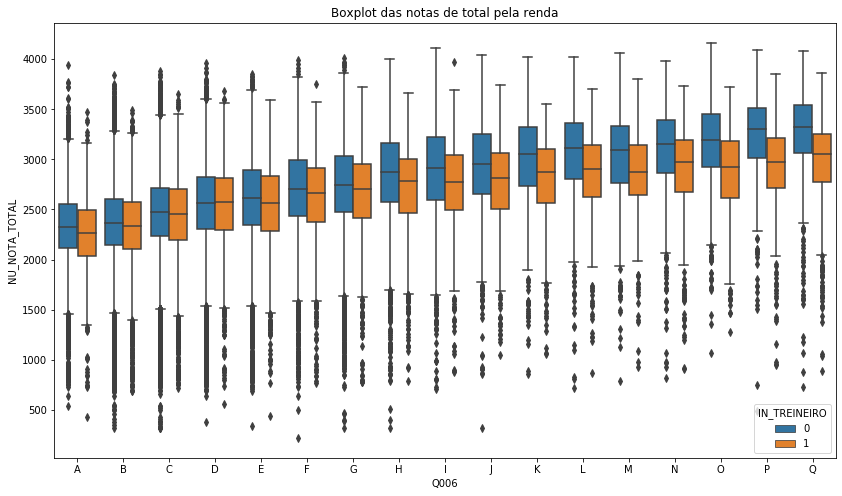

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = df_sem_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

###### Desafio 01 - Pegar a amostra completa dos alunos menores de idade

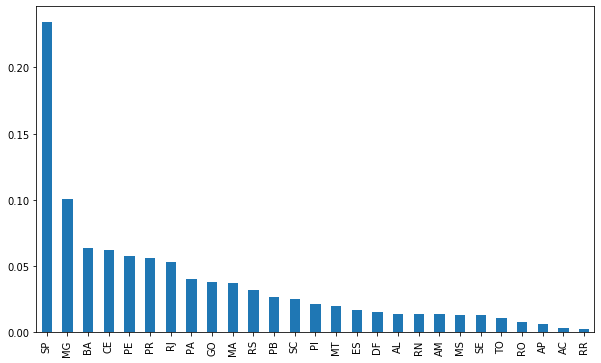

In [32]:
alunos_menor_idade = df.query("NU_IDADE <= 17")
alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10, 6))

###### Desafio 02 - aumentar a amostra para alunos menor de idade e compara a proporção por estado

In [19]:
df["NU_IDADE"].value_counts()*100/df["NU_IDADE"].count()

18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

In [20]:
df.query("NU_IDADE < 18")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

SP    0.234347
MG    0.100704
BA    0.063796
CE    0.062516
PE    0.057778
PR    0.056466
RJ    0.052849
PA    0.040589
GO    0.038380
MA    0.037260
RS    0.031690
PB    0.026825
SC    0.025448
PI    0.021703
MT    0.019590
ES    0.016549
DF    0.015109
AL    0.014277
RN    0.013732
AM    0.013700
MS    0.013476
SE    0.012964
TO    0.011012
RO    0.007490
AP    0.006018
AC    0.003489
RR    0.002241
Name: SG_UF_RESIDENCIA, dtype: float64

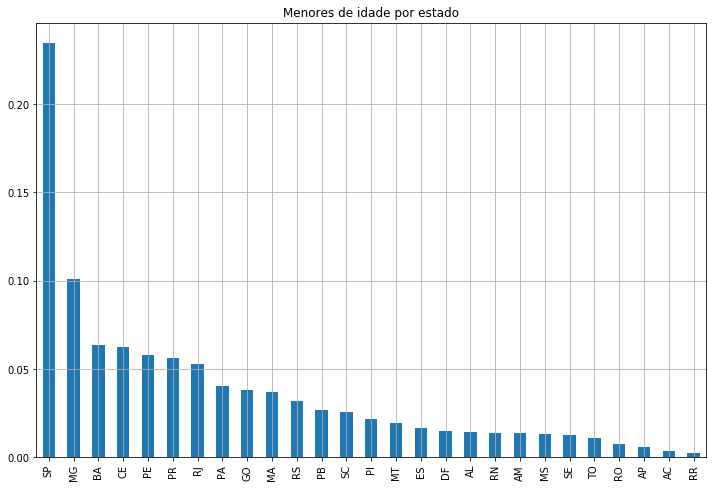

In [23]:
df.query("NU_IDADE < 18")["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(12,8), grid=True, title='Menores de idade por estado')

In [22]:
# Tamanho dos dados
len(df.query("NU_IDADE < 18"))

31240

###### Desafio 03 Crie uma função para plotar o boxplot do seaborn

In [55]:
def plot_boxplot(X, y, df, titulo, matiz = None):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x= X, y = y, data = df, order = renda_ordenada, hue = matiz)
  plt.title(titulo)
  plt.show()

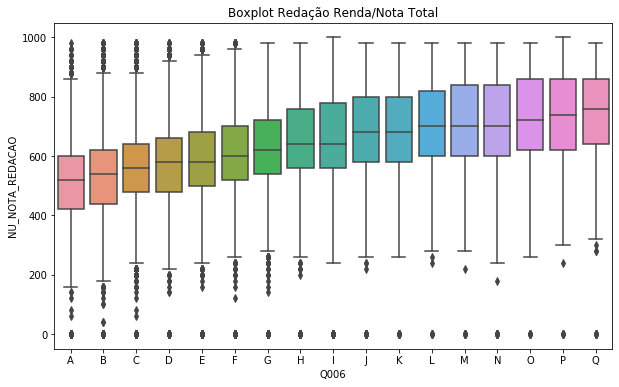

In [30]:
# Utilizando a função para plotar a nota da redação
plot_boxplot("Q006", "NU_NOTA_REDACAO",df, 'Boxplot Redação Renda/Nota Total')

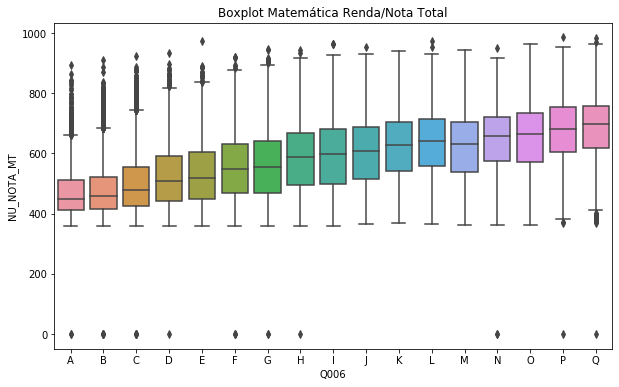

In [31]:
# Utilizando a função para plotar a nota de matemática
plot_boxplot("Q006", "NU_NOTA_MT",df, 'Boxplot Matemática Renda/Nota Total')

###### Desafio 04 - Verificar se quem zerou a prova foi eliminado ou não estava presente

In [33]:
# 18 pessoas estavam presentes na prova de CN e zeraram a prova.
df.query("NU_NOTA_CN == 0")["TP_PRESENCA_CN"].value_counts()

1    18
Name: TP_PRESENCA_CN, dtype: int64

In [34]:
# Não existe valores para pessoas que foram eliminadas na prova (ou seja, receberam NaN)
df.query("TP_PRESENCA_CN == 1")["NU_NOTA_CN"].isnull().sum()

0

In [35]:
# Todas as pessoas que foram fazer a prova possuem nota.
df.query("TP_PRESENCA_CN == 2")["NU_NOTA_CN"].value_counts()

Series([], Name: NU_NOTA_CN, dtype: int64)

Com isso, podemos afirmar que quem zerou a prova ficou com 0, e quem não estava presente recebeu NaN.

###### Desafio 05 - Quem é eliminado tira zero ou será NaN (não teve registro de notas)

In [37]:
# Não existem valores para quem faltou à prova
df.query("TP_PRESENCA_CN == 0")["NU_NOTA_CN"].value_counts()

Series([], Name: NU_NOTA_CN, dtype: int64)

Com isso podemos afirmar que as pessoas eliminadas ou que faltaram à prova não possuem nota (ficando com NaN)

###### Desafio 06 - Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

In [39]:
treineiros = df_sem_zero.query("IN_TREINEIRO == 1")["Q006"].value_counts()
naotreineiros = df_sem_zero.query("IN_TREINEIRO == 0")["Q006"].value_counts()

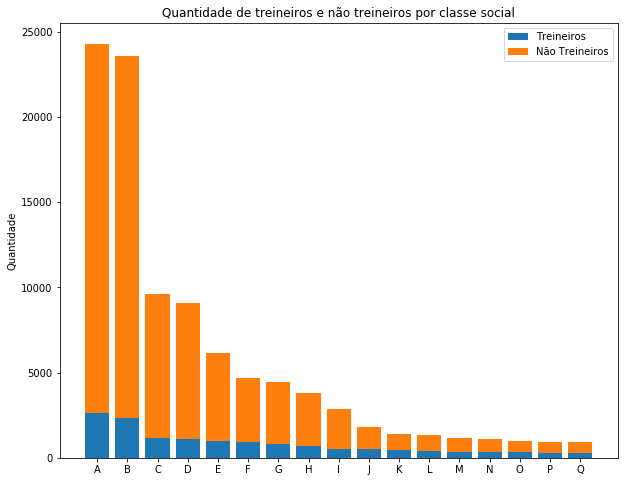

In [40]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(renda_ordenada, treineiros, label='Treineiros')
ax.bar(renda_ordenada, naotreineiros, bottom=treineiros, label='Não Treineiros')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de treineiros e não treineiros por classe social')
ax.legend()

plt.show()

###### Desafio 07 - Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

In [61]:
q006 = df_sem_zero["Q025"].replace({'A': 'Não', 'B': 'Sim'})
notas_por_renda_internet = pd.DataFrame({'Faixa Renda': df_sem_zero["Q006"],
                                         'Acesso à Internet': q006,
                                         'Nota Total': df_sem_zero["NU_NOTA_TOTAL"]})

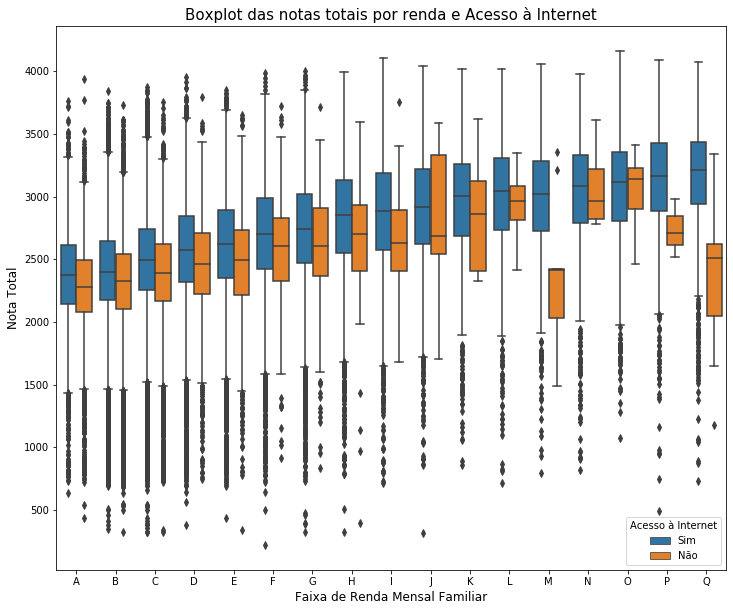

In [62]:
f, ax = plt.subplots(figsize=(12, 10))
sns.boxplot(x="Faixa Renda", y="Nota Total", data=notas_por_renda_internet,
            hue="Acesso à Internet", order=renda_ordenada, )
ax.set_title("Boxplot das notas totais por renda e Acesso à Internet", fontdict={'fontsize': 15})
ax.xaxis.set_label_text("Faixa de Renda Mensal Familiar", fontdict={'fontsize': 12})
ax.yaxis.set_label_text("Nota Total", fontdict={'fontsize': 12})
plt.show()